In [2]:
import pandas as pd 
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
import seaborn as sns
from matplotlib import rcParams

In [3]:
berlinplan = gpd.read_file('D:/urbban/Planungsraum_EPSG_25833_well.shp',encoding='utf-8')  
berlinplan = gpd.GeoDataFrame(berlinplan,geometry='geometry',crs={'init':'epsg:25833'})

C:\Users\Alex\anaconda3\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


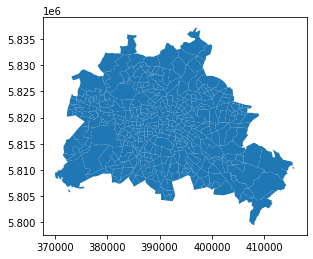

In [4]:
berlinplan.plot()

In [5]:
berlinplan.BEZIRK.count()

448

In [6]:
berlinplan['BEZIRK'].value_counts()

Charlottenburg-Wilmersdorf    57
Mitte                         41
Steglitz-Zehlendorf           41
Neukölln                      40
Pankow                        40
Spandau                       39
Treptow-Köpenick              35
Tempelhof-Schöneberg          34
Marzahn-Hellersdorf           33
Lichtenberg                   32
Reinickendorf                 30
Friedrichshain-Kreuzberg      26
Name: BEZIRK, dtype: int64

In [44]:
berlinplan.new = berlinplan.BEZIRK


C:\Users\Alex\anaconda3\lib\site-packages\geopandas\geodataframe.py:97: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  super(GeoDataFrame, self).__setattr__(attr, val)


In [46]:
berlinplan.new

0                 Mitte
1                 Mitte
2                 Mitte
3                 Mitte
4                 Mitte
             ...       
443    Treptow-Köpenick
444    Treptow-Köpenick
445    Treptow-Köpenick
446    Treptow-Köpenick
447    Treptow-Köpenick
Name: BEZIRK, Length: 448, dtype: object

In [9]:
berlinplan['BEZIRK'].unique()

array(['Mitte', 'Friedrichshain-Kreuzberg', 'Pankow',
       'Charlottenburg-Wilmersdorf', 'Spandau', 'Steglitz-Zehlendorf',
       'Tempelhof-Schöneberg', 'Neukölln', 'Treptow-Köpenick',
       'Marzahn-Hellersdorf', 'Lichtenberg', 'Reinickendorf'],
      dtype=object)

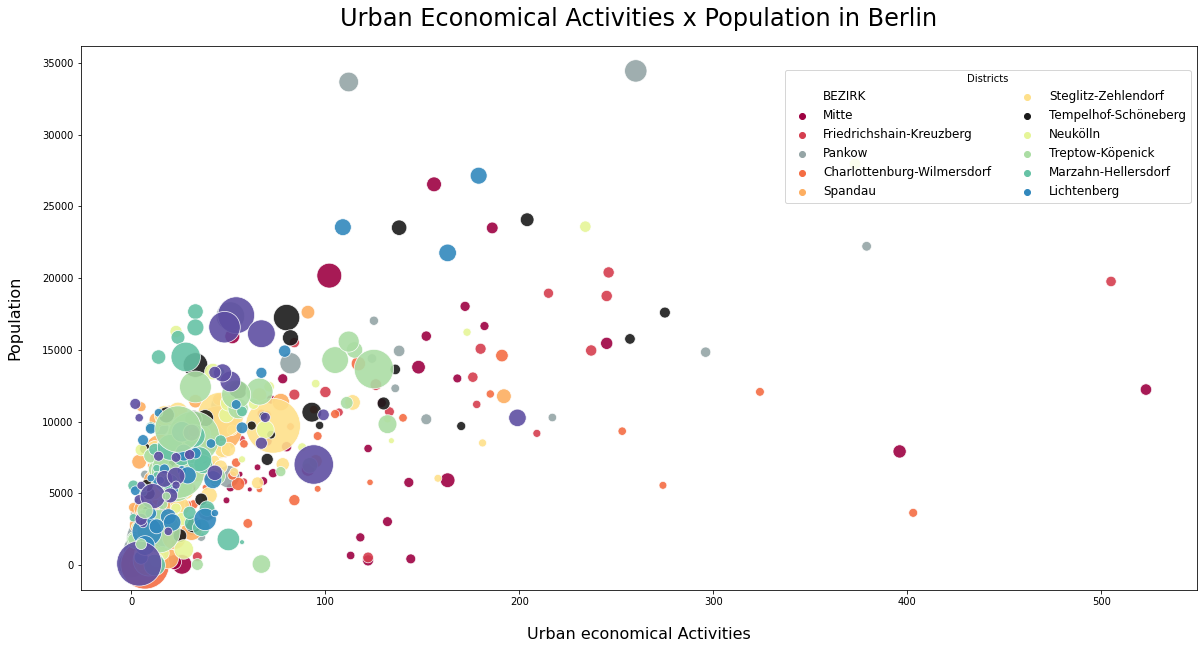

In [55]:
plt.figure(figsize=(20, 10))
flatui = ['#9e0142' ,'#d53e4f',"#95a5a6", "#f46d43", "#fdae61", "#fee08b","#1a1a1a", "#e6f598", "#abdda4", "#66c2a5", "#3288bd",
          '#5e4fa2']
ax = sns.scatterplot(x="activity", y="habitants",hue='BEZIRK',
                      size=berlinplan['surface'].values,
                     sizes=(20, 3000),alpha=0.9,palette=flatui, data=berlinplan)
ax.set_title("Urban Economical Activities x Population in Berlin",size=24, pad=20)
plt.xlabel("Urban economical Activities",size=16,labelpad=20)
plt.ylabel("Population",size=16, labelpad=20)
h,l = ax.get_legend_handles_labels()
ax.legend(h[:12], l[:12],loc='lower right',ncol=2,title="Districts",scatterpoints=1,prop={'size': 12},
          bbox_to_anchor=(1, 0.7))

#plt.savefig('D:/urbban/berlin_scatter.png')

In [56]:
berlinplan.to_csv("D:/urbban/berlinplan.csv")

In [60]:
ast = pd.read_csv("D:/urbban/berlinplan.csv")
ast.columns

Index(['Unnamed: 0', 'BEZIRKSREG', 'BEZIRK', 'DESKRIPTOR', 'KLASSE',
       'KLASSENNAM', 'SCHLUESSEL', 'surface', 'activity', 'habitants',
       'medina_hab', 'diff_mean', 'diff_media', 'geometry'],
      dtype='object')

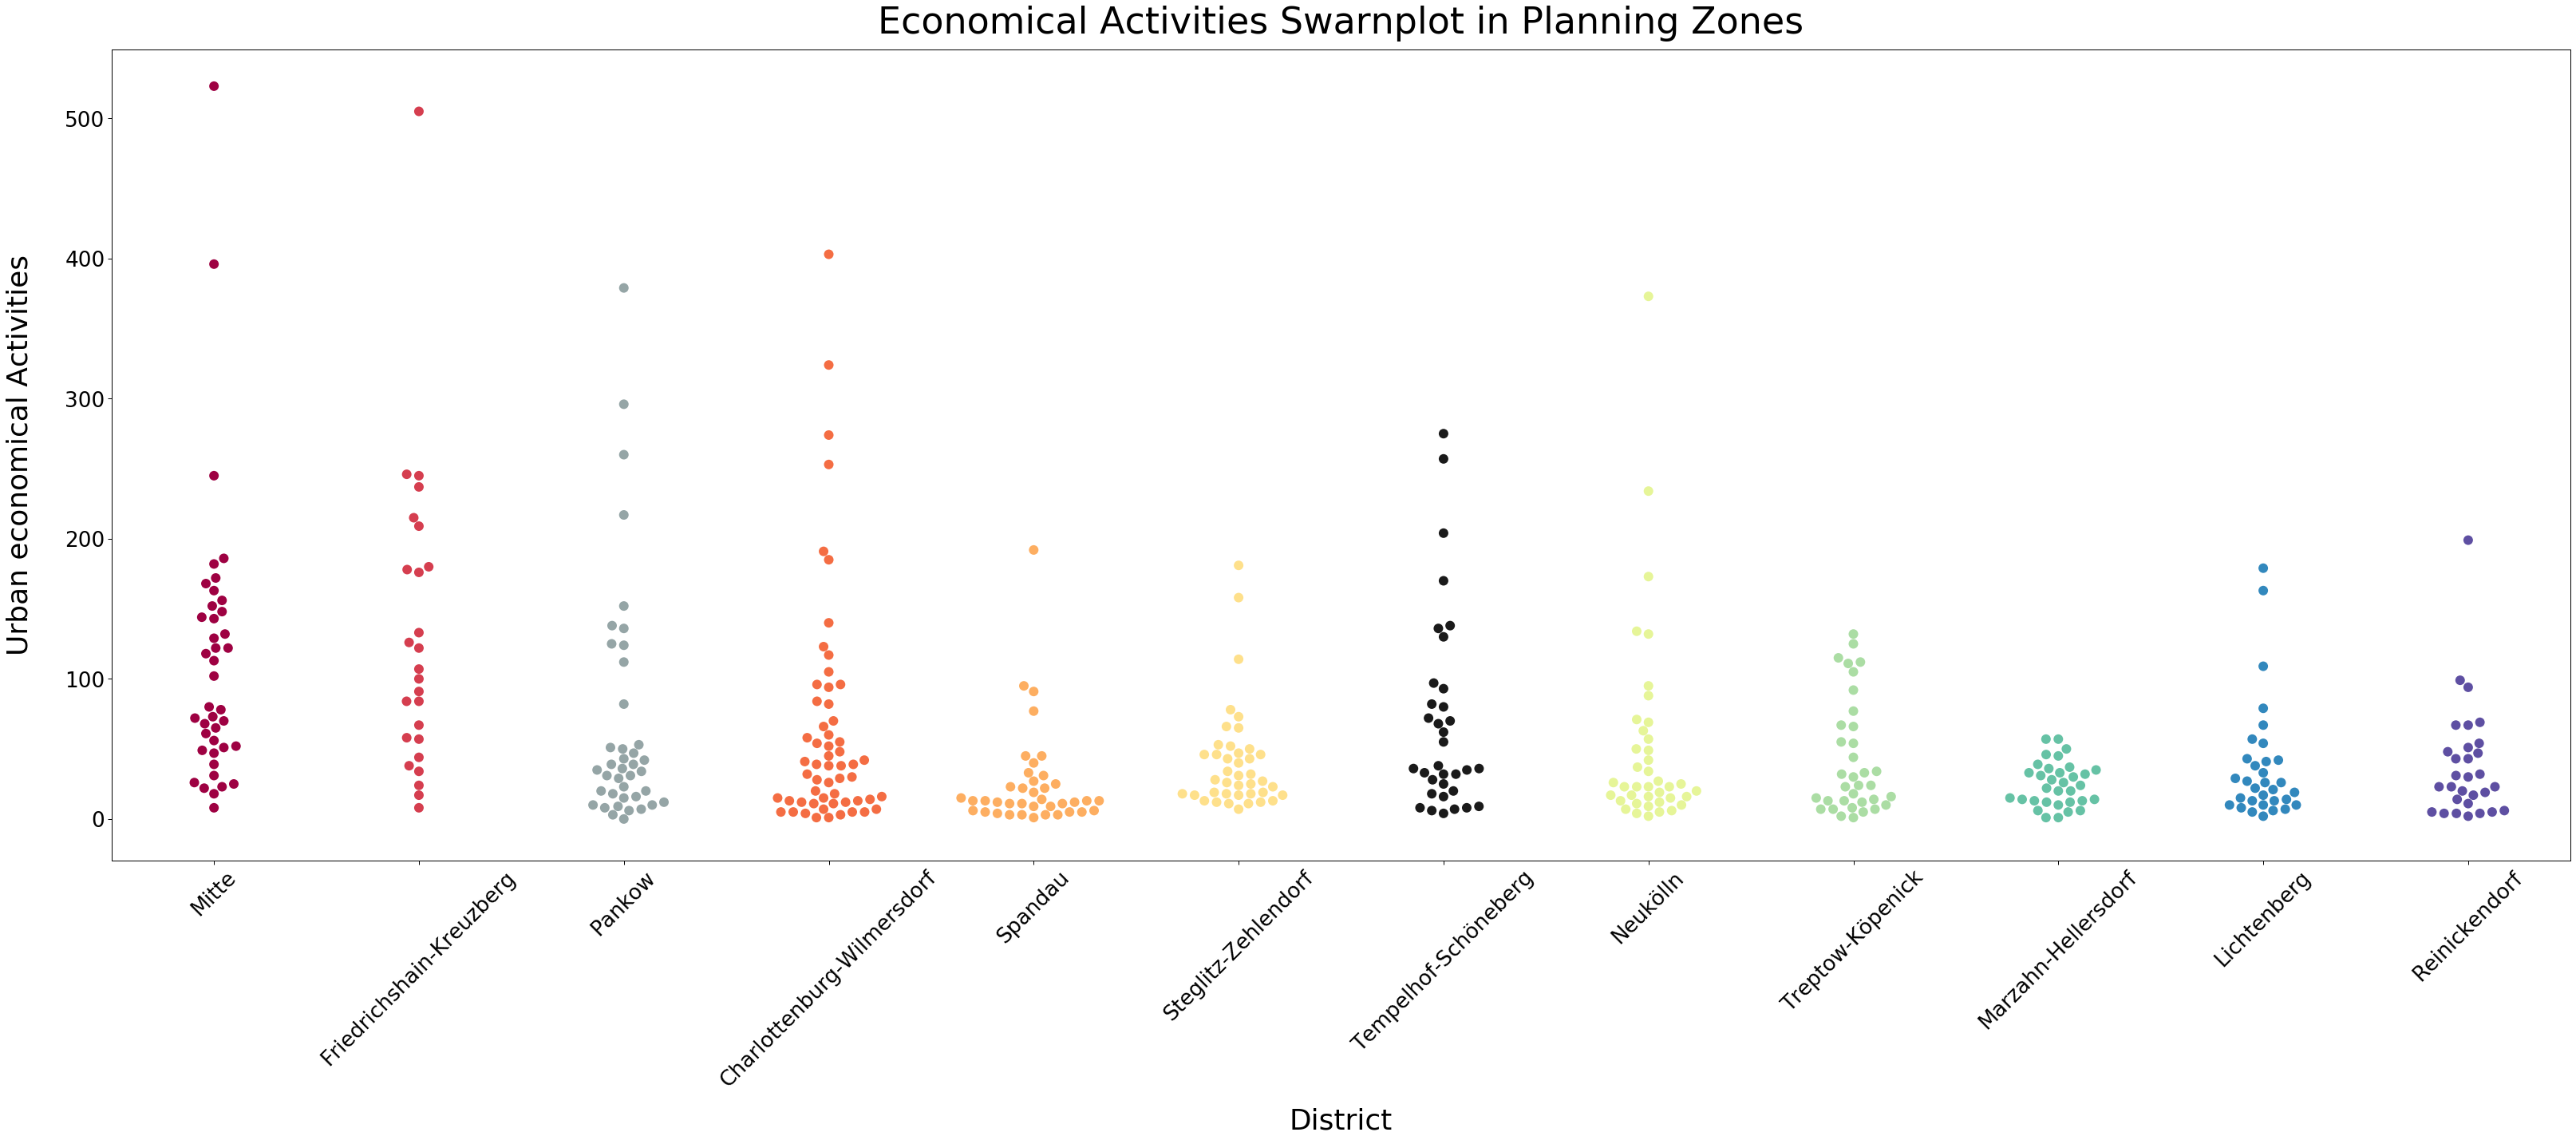

In [46]:
rcParams.update({'figure.autolayout': True})
sns.set_context("paper", font_scale=3, rc={"font.size":12,"axes.labelsize":25})

plt.figure(figsize=(45, 20))
plt.xticks(rotation=45)
plt.subplots_adjust(bottom=0.15)
ax = sns.swarmplot(x='BEZIRK', y="activity", palette=flatui,size=12,data=berlinplan)
plt.xlabel("District", size=36, labelpad=20)
plt.ylabel("Urban economical Activities", size=36, labelpad=40)
plt.title("Economical Activities Swarnplot in Planning Zones", size=46,pad=20)


plt.savefig('D:/urbban/berlin_swarn2.png')